In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

df = pd.read_csv("drive/MyDrive/Competitions/all_matches.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
display(df.head())

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(len(df))

194354


In [ ]:
cols = ['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed']

In [ ]:
df = df[cols]

In [ ]:
df['total_runs'] = df['runs_off_bat']+df['extras']

In [ ]:
df = df[df['ball']<6]

In [ ]:
df = df[df['innings']<=2]

In [ ]:
df.dtypes

match_id              int64
season               object
start_date           object
venue                object
innings               int64
ball                float64
batting_team         object
bowling_team         object
striker              object
non_striker          object
bowler               object
runs_off_bat          int64
extras                int64
wides               float64
noballs             float64
byes                float64
legbyes             float64
penalty             float64
wicket_type          object
player_dismissed     object
total_runs            int64
dtype: object

In [ ]:
aggregation_functions = {'venue': 'first', 
                         'innings': 'first', 
                         'batting_team': 'first', 
                         'bowling_team': 'first',
                         'total_runs': 'sum', 
                         'batsmen': list,
                         'bowler': list
                        }

df['batsmen'] = df.apply(lambda x: list([x['striker'],
                                       x['non_striker'],]), axis=1)
df_new = df.groupby(df['match_id']).aggregate(aggregation_functions)


In [ ]:
display(df_new.head())

,venue,innings,batting_team,bowling_team,total_runs,batsmen,bowler
match_id,,,,,,,
335982,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,87,"[[SC Ganguly, BB McCullum], [BB McCullum, SC G...","[P Kumar, P Kumar, P Kumar, P Kumar, P Kumar, ..."
335983,"Punjab Cricket Association Stadium, Mohali",1,Chennai Super Kings,Kings XI Punjab,116,"[[PA Patel, ML Hayden], [PA Patel, ML Hayden],...","[B Lee, B Lee, B Lee, B Lee, B Lee, B Lee, S S..."
335984,Feroz Shah Kotla,1,Rajasthan Royals,Delhi Daredevils,95,"[[T Kohli, YK Pathan], [T Kohli, YK Pathan], [...","[GD McGrath, GD McGrath, GD McGrath, GD McGrat..."
335985,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,87,"[[L Ronchi, ST Jayasuriya], [L Ronchi, ST Jaya...","[P Kumar, P Kumar, P Kumar, P Kumar, P Kumar, ..."
335986,Eden Gardens,1,Deccan Chargers,Kolkata Knight Riders,65,"[[AC Gilchrist, Y Venugopal Rao], [Y Venugopal...","[AB Dinda, AB Dinda, AB Dinda, AB Dinda, AB Di..."


In [ ]:
import itertools
import numpy as np

batsmen_all = pd.Series(np.unique([*itertools.chain.from_iterable(df_new.batsmen)]))
bowler_all = pd.Series(np.unique([*itertools.chain.from_iterable(df_new.bowler)]))

for i, row in df_new.iterrows():
    batsmen_final_list = []
    for l in row['batsmen']:
        batsmen_final_list += l
    df_new.at[i, 'batsmen'] = list(set(batsmen_final_list))   
    df_new.at[i, 'bowler'] = list(set(row['bowler']))

In [ ]:
batsmen_dict = {}
for i in range(len(batsmen_all)):
    batsmen_dict[batsmen_all[i]] = i

bowler_dict = {}
for i in range(len(bowler_all)):
    bowler_dict[bowler_all[i]] = i

print(batsmen_dict)
print(bowler_dict)


{'A Ashish Reddy': 0, 'A Chopra': 1, 'A Flintoff': 2, 'A Mishra': 3, 'A Mukund': 4, 'A Symonds': 5, 'AA Bilakhia': 6, 'AA Jhunjhunwala': 7, 'AB Agarkar': 8, 'AB Barath': 9, 'AB McDonald': 10, 'AB de Villiers': 11, 'AC Blizzard': 12, 'AC Gilchrist': 13, 'AC Voges': 14, 'AD Hales': 15, 'AD Mascarenhas': 16, 'AD Mathews': 17, 'AD Nath': 18, 'AD Russell': 19, 'AG Paunikar': 20, 'AJ Finch': 21, 'AL Menaria': 22, 'AM Nayar': 23, 'AM Rahane': 24, 'AN Ghosh': 25, 'AP Majumdar': 26, 'AP Tare': 27, 'AR Patel': 28, 'AS Raut': 29, 'AT Rayudu': 30, 'AUK Pathan': 31, 'Anirudh Singh': 32, 'Ankit Sharma': 33, 'Azhar Mahmood': 34, 'B Chipli': 35, 'BA Stokes': 36, 'BB McCullum': 37, 'BB Samantray': 38, 'BJ Haddin': 39, 'BJ Hodge': 40, 'BMAJ Mendis': 41, 'BR Dunk': 42, 'C Madan': 43, 'C Munro': 44, 'C de Grandhomme': 45, 'CA Ingram': 46, 'CA Lynn': 47, 'CA Pujara': 48, 'CH Gayle': 49, 'CH Morris': 50, 'CJ Anderson': 51, 'CJ Ferguson': 52, 'CL White': 53, 'CM Gautam': 54, 'D Padikkal': 55, 'DA Miller': 56

In [ ]:
import pickle

a_file = open("batsmen.pkl", "wb")
pickle.dump(batsmen_dict, a_file)
a_file.close()

a_file = open("bowlers.pkl", "wb")
pickle.dump(bowler_dict, a_file)
a_file.close()

In [ ]:
final_df = df_new

In [ ]:
for i, row in final_df.iterrows():
    final_df.at[i, "batsmen"] = [batsmen_dict[bat] for bat in row['batsmen']]
    final_df.at[i, "bowler"] = [bowler_dict[bat] for bat in row['bowler']]

In [ ]:
final_df

,venue,innings,batting_team,bowling_team,total_runs,batsmen,bowler
match_id,,,,,,,
335982,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,87,"[161, 211, 99, 275, 192, 269, 37, 53, 226]","[111, 19, 17, 18, 223, 345]"
335983,"Punjab Cricket Association Stadium, Mohali",1,Chennai Super Kings,Kings XI Punjab,116,"[144, 180, 113, 107, 152, 109]","[203, 141, 49, 275, 127]"
335984,Feroz Shah Kotla,1,Rajasthan Royals,Delhi Daredevils,95,"[259, 283, 133, 270, 78, 217, 242]","[289, 97, 46, 198, 191, 299]"
335985,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,87,"[192, 131, 216, 213, 124, 65, 188, 245]","[295, 345, 131, 223, 91, 8]"
335986,Eden Gardens,1,Deccan Chargers,Kolkata Knight Riders,65,"[277, 211, 273, 63, 5, 37, 226, 281, 13]","[281, 111, 254, 19, 18, 337]"
...,...,...,...,...,...,...,...
1237180,Sheikh Zayed Stadium,1,Delhi Capitals,Sunrisers Hyderabad,114,"[104, 57, 185, 156, 150, 121, 217]","[147, 271, 307, 10, 236, 135, 201]"
1237181,Dubai International Cricket Stadium,1,Delhi Capitals,Mumbai Indians,102,"[24, 243, 207, 202, 189, 224, 156, 217]","[147, 10, 236, 132, 219, 122, 201, 317, 35]"
1254058,"MA Chidambaram Stadium, Chepauk, Chennai",1,Mumbai Indians,Royal Challengers Bangalore,87,"[47, 205, 202, 269, 278, 82, 224]","[154, 208, 150, 344, 132, 180, 317]"


In [ ]:
final_df.head()

,venue,innings,batting_team,bowling_team,total_runs,batsmen,bowler
match_id,,,,,,,
335982,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,87,"[161, 211, 99, 275, 192, 269, 37, 53, 226]","[111, 19, 17, 18, 223, 345]"
335983,"Punjab Cricket Association Stadium, Mohali",1,Chennai Super Kings,Kings XI Punjab,116,"[144, 180, 113, 107, 152, 109]","[203, 141, 49, 275, 127]"
335984,Feroz Shah Kotla,1,Rajasthan Royals,Delhi Daredevils,95,"[259, 283, 133, 270, 78, 217, 242]","[289, 97, 46, 198, 191, 299]"
335985,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,87,"[192, 131, 216, 213, 124, 65, 188, 245]","[295, 345, 131, 223, 91, 8]"
335986,Eden Gardens,1,Deccan Chargers,Kolkata Knight Riders,65,"[277, 211, 273, 63, 5, 37, 226, 281, 13]","[281, 111, 254, 19, 18, 337]"


In [ ]:
final_df = pd.concat([final_df.reset_index(), pd.DataFrame(final_df.batsmen.values.tolist()).add_prefix('batsmen_')],axis=1)
final_df = pd.concat([final_df.reset_index(), pd.DataFrame(final_df.bowler.values.tolist()).add_prefix('bowlers_')],axis=1)
final_df = final_df.drop('batsmen', axis = 1)
final_df = final_df.drop('bowler', axis = 1)
display(final_df.head())


,index,match_id,venue,innings,batting_team,bowling_team,total_runs,batsmen_0,batsmen_1,batsmen_2,batsmen_3,batsmen_4,batsmen_5,batsmen_6,batsmen_7,batsmen_8,batsmen_9,batsmen_10,batsmen_11,batsmen_12,bowlers_0,bowlers_1,bowlers_2,bowlers_3,bowlers_4,bowlers_5,bowlers_6,bowlers_7,bowlers_8,bowlers_9
0,0,335982,M Chinnaswamy Stadium,1,Kolkata Knight Riders,Royal Challengers Bangalore,87,161,211,99,275,192.0,269.0,37.0,53.0,226.0,NaN,NaN,NaN,NaN,111,19,17,18.0,223.0,345.0,NaN,NaN,NaN,NaN
1,1,335983,"Punjab Cricket Association Stadium, Mohali",1,Chennai Super Kings,Kings XI Punjab,116,144,180,113,107,152.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203,141,49,275.0,127.0,NaN,NaN,NaN,NaN,NaN
2,2,335984,Feroz Shah Kotla,1,Rajasthan Royals,Delhi Daredevils,95,259,283,133,270,78.0,217.0,242.0,NaN,NaN,NaN,NaN,NaN,NaN,289,97,46,198.0,191.0,299.0,NaN,NaN,NaN,NaN
3,3,335985,Wankhede Stadium,1,Mumbai Indians,Royal Challengers Bangalore,87,192,131,216,213,124.0,65.0,188.0,245.0,NaN,NaN,NaN,NaN,NaN,295,345,131,223.0,91.0,8.0,NaN,NaN,NaN,NaN
4,4,335986,Eden Gardens,1,Deccan Chargers,Kolkata Knight Riders,65,277,211,273,63,5.0,37.0,226.0,281.0,13.0,NaN,NaN,NaN,NaN,281,111,254,19.0,18.0,337.0,NaN,NaN,NaN,NaN


In [ ]:
final_df = pd.DataFrame(final_df)


In [ ]:
from sklearn.preprocessing import LabelEncoder

venue_encoder = LabelEncoder()
team_encoder = LabelEncoder()

final_df['venue'] = venue_encoder.fit_transform(final_df['venue'])
final_df['batting_team'] = team_encoder.fit_transform(final_df['batting_team'])
final_df['bowling_team'] = team_encoder.fit_transform(final_df['bowling_team'])


In [ ]:
import numpy as np

np.save('venue_encoder.npy', venue_encoder.classes_)
np.save('team_encoder.npy', team_encoder.classes_)


In [ ]:
final_df.head()

,index,match_id,venue,innings,batting_team,bowling_team,total_runs,batsmen_0,batsmen_1,batsmen_2,batsmen_3,batsmen_4,batsmen_5,batsmen_6,batsmen_7,batsmen_8,batsmen_9,batsmen_10,batsmen_11,batsmen_12,bowlers_0,bowlers_1,bowlers_2,bowlers_3,bowlers_4,bowlers_5,bowlers_6,bowlers_7,bowlers_8,bowlers_9
0,0,335982,15,1,7,13,87,161,211,99,275,192.0,269.0,37.0,53.0,226.0,NaN,NaN,NaN,NaN,111,19,17,18.0,223.0,345.0,NaN,NaN,NaN,NaN
1,1,335983,27,1,0,5,116,144,180,113,107,152.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203,141,49,275.0,127.0,NaN,NaN,NaN,NaN,NaN
2,2,335984,9,1,10,3,95,259,283,133,270,78.0,217.0,242.0,NaN,NaN,NaN,NaN,NaN,NaN,289,97,46,198.0,191.0,299.0,NaN,NaN,NaN,NaN
3,3,335985,40,1,8,13,87,192,131,216,213,124.0,65.0,188.0,245.0,NaN,NaN,NaN,NaN,NaN,295,345,131,223.0,91.0,8.0,NaN,NaN,NaN,NaN
4,4,335986,8,1,1,7,65,277,211,273,63,5.0,37.0,226.0,281.0,13.0,NaN,NaN,NaN,NaN,281,111,254,19.0,18.0,337.0,NaN,NaN,NaN,NaN


In [ ]:
final_df = final_df.drop('match_id', axis = 1)
final_df = final_df.drop('index', axis = 1)
final_df = final_df.fillna(0)

In [ ]:
train_x = final_df
train_x = pd.DataFrame(train_x.drop('total_runs', axis=1))
train_y = pd.Series(final_df['total_runs'])

In [ ]:
train_x.columns

Index(['venue', 'innings', 'batting_team', 'bowling_team', 'batsmen_0',
       'batsmen_1', 'batsmen_2', 'batsmen_3', 'batsmen_4', 'batsmen_5',
       'batsmen_6', 'batsmen_7', 'batsmen_8', 'batsmen_9', 'batsmen_10',
       'batsmen_11', 'batsmen_12', 'bowlers_0', 'bowlers_1', 'bowlers_2',
       'bowlers_3', 'bowlers_4', 'bowlers_5', 'bowlers_6', 'bowlers_7',
       'bowlers_8', 'bowlers_9'],
      dtype='object')

In [ ]:
train_x.shape

(819, 27)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.05, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

target_scaler = MinMaxScaler()
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
target_scaler.fit(y_train)

y_train = target_scaler.transform(y_train)
y_test = target_scaler.transform(y_test)


In [ ]:
from pickle import dump

dump(sc, open('scaler.pkl', 'wb'))
dump(target_scaler, open('target_scaler.pkl', 'wb'))

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf


In [ ]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 27))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')


In [ ]:
model.fit(x_test, y_test, batch_size = 10, epochs = 100)


Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3448
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1566
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0967
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0560
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0417
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0344
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0229
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0167
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.save("SequentialModel")


INFO:tensorflow:Assets written to: SequentialModel/assets


In [ ]:
y_test = target_scaler.inverse_transform(y_test)
y_pred = target_scaler.inverse_transform(y_pred)


In [ ]:
from sklearn.metrics import mean_squared_error
errors = list()
for i in range(len(y_test)):
	err = (y_test[i] - y_pred[i])**2
	errors.append(err)
	print('%f, %f = %f' % (y_test[i], y_pred[i], err))


111.000000, 111.002892 = 0.000008
76.000000, 76.006226 = 0.000039
60.000000, 60.040909 = 0.001674
76.000000, 76.006775 = 0.000046
112.000000, 112.005180 = 0.000027
84.000000, 83.991356 = 0.000075
128.000000, 127.997025 = 0.000009
82.000000, 82.003792 = 0.000014
91.000000, 91.007668 = 0.000059
79.000000, 79.010727 = 0.000115
93.000000, 92.994926 = 0.000026
74.000000, 74.001518 = 0.000002
94.000000, 94.045799 = 0.002098
85.000000, 84.997765 = 0.000005
85.000000, 84.999535 = 0.000000
105.000000, 105.003815 = 0.000015
82.000000, 82.015099 = 0.000228
95.000000, 94.997765 = 0.000005
73.000000, 73.000336 = 0.000000
70.000000, 70.014122 = 0.000199
120.000000, 120.001610 = 0.000003
81.000000, 80.999977 = 0.000000
82.000000, 82.005829 = 0.000034
102.000000, 102.017769 = 0.000316
83.000000, 83.013802 = 0.000190
106.000000, 106.003220 = 0.000010
115.000000, 115.008095 = 0.000066
75.000000, 75.006630 = 0.000044
110.000000, 109.991196 = 0.000078
95.000000, 95.002289 = 0.000005
90.000000, 90.009933 =

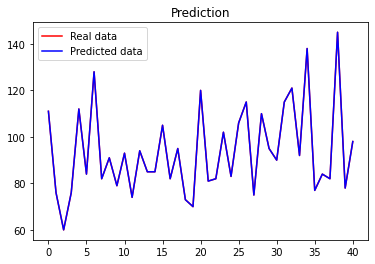

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

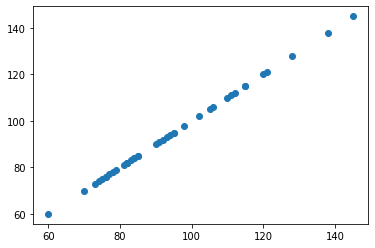

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()